# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

product_sales = pd.read_csv('product_sales.csv')

In [3]:
print(product_sales.head())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


In [4]:
print(product_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


Data Validation:

Ensuring all columns are of the correct data type:

In [6]:
product_sales['sales_method'] = product_sales['sales_method'].astype('category')
product_sales['state'] = product_sales['state'].astype('category')

print(product_sales.dtypes)

week                    int64
sales_method         category
customer_id            object
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                category
dtype: object


Ensuring consistency of entries in sales method and state columns:

In [7]:
print(product_sales['sales_method'].unique())
print(product_sales['state'].unique())

['Email', 'Email + Call', 'Call', 'em + call', 'email']
Categories (5, object): ['Call', 'Email', 'Email + Call', 'em + call', 'email']
['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois', ..., 'Vermont', 'Rhode Island', 'Nevada', 'Idaho', 'Wyoming']
Length: 50
Categories (50, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Fixing non-uniformity in sales method column:

In [8]:
product_sales['sales_method'] = product_sales['sales_method'].str.lower().str.strip()
product_sales['sales_method'] = product_sales['sales_method'].replace('em + call', 'email + call')
product_sales['sales_method'] = product_sales['sales_method'].str.title()

print(product_sales['sales_method'].unique())

['Email' 'Email + Call' 'Call']


Removing duplicate rows:

In [9]:
product_sales = product_sales.drop_duplicates()

Checking for outliers in the years_as_customer column, given the company was founded in 1984 it's impossible for a customer to have been a customer for more than 39-40 years:

In [14]:
outliers = product_sales[(product_sales['years_as_customer'] > 39)]
print(outliers)

       week sales_method                           customer_id  nb_sold  \
13741     2        Email  18919515-a618-430c-9a05-2c7d8fea96af       10   
13800     4         Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10   

       revenue  years_as_customer  nb_site_visits       state  
13741    97.22                 63              24  California  
13800    50.47                 47              27  California  


Removing outliers from the years_as_customer column. Chose to remove rather than imputing values as I have no way to know whether it's simply an error in data entry for this column or if the whole row is erroneous. I think removing the rows is reasonable as only 2 columns are affected and such removing them isn't likely to have too much of an impact on the analysis:

In [15]:
product_sales = product_sales[product_sales['years_as_customer'] <= 39]

I don't think it's correct to asssume that the missing values in the revenue column are equal to 0, as their respective nb_sold values are not 0, which means they bought something. As such, I decided the best way to deal with these missing values was to fill them with the sample mean.

In [22]:
mean_rev = product_sales['revenue'].mean(skipna=True)
product_sales['revenue'].fillna(mean_rev, inplace=True)

print(product_sales['revenue'].info())

<class 'pandas.core.series.Series'>
Int64Index: 15000 entries, 0 to 14999
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
15000 non-null  float64
dtypes: float64(1)
memory usage: 234.4 KB
None


Checking all customer ids are unique:

In [23]:
assert product_sales['customer_id'].is_unique

Data Exploration:

Exploring distribution of number of products sold to each customer:

16
7
10.084666666666667
1.8122133327416081


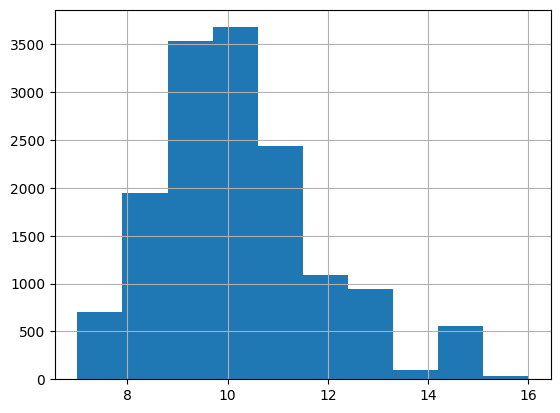

In [24]:
print(product_sales['nb_sold'].max())
print(product_sales['nb_sold'].min())
print(product_sales['nb_sold'].mean())
print(product_sales['nb_sold'].std())
product_sales['nb_sold'].hist()

plt.show()

Looks like the average number of products is around 10, with a relatively low standard deviation showing that people rarely buy less than 8 or more than 12 products.

Exploring the sales methods:

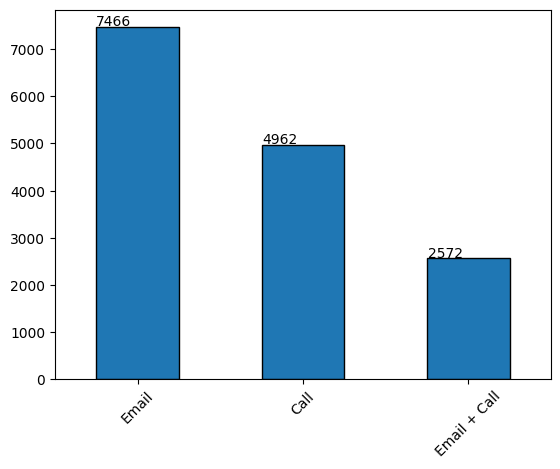

In [25]:
sales_method_counts = product_sales['sales_method'].value_counts()
ax = sales_method_counts.plot(kind='bar', edgecolor='black')

plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Looks like Email is generally the preferred method for most customers, with about half using solely email, however a decent amount still use the phone and about 17% of customers use a mixture of both.

Exploring the spread of the revenue:

In [26]:
print(product_sales['revenue'].describe())

count    15000.000000
mean        93.934943
std         45.705474
min         32.540000
25%         53.040000
50%         91.865000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64


In [27]:
print(product_sales.groupby('sales_method')['revenue'].describe())

               count        mean        std  ...      50%       75%         max
sales_method                                 ...                               
Call          4962.0   49.287730  12.120498  ...   49.935   52.9775   93.934943
Email         7466.0   96.895049  10.826126  ...   94.275  104.4600  148.970000
Email + Call  2572.0  171.477444  40.931708  ...  182.135  189.5350  238.320000

[3 rows x 8 columns]


The call method has the lowest average revenue received ($47.60) with a narrower spread, while email had a much higher average revenue ($96.90) than calls. Customers who used both have an even higher average revenue contributed ($171.48).

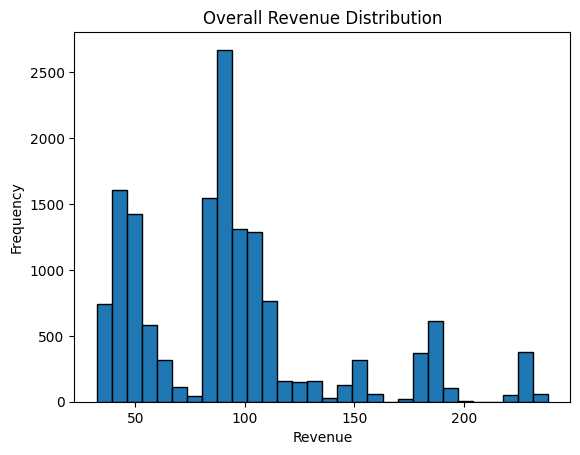

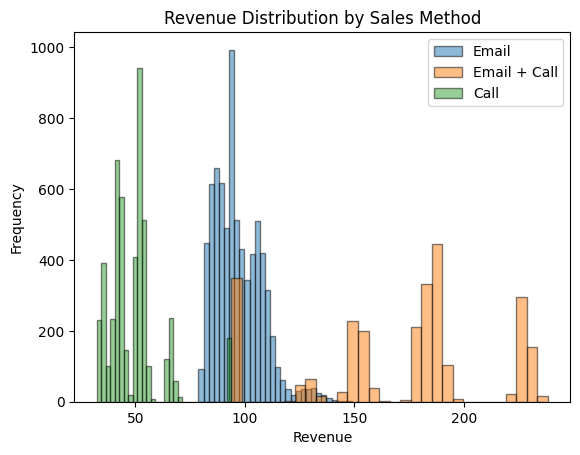

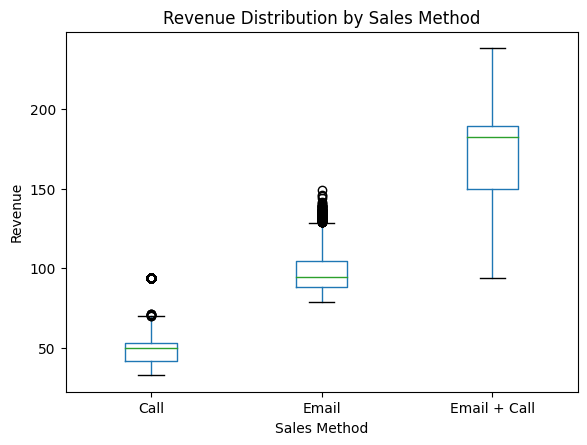

In [28]:
#histogram of rev distribution
plt.hist(product_sales['revenue'].dropna(), bins=30, edgecolor='black')
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

#by sales method
sales_methods = product_sales['sales_method'].unique()

for method in sales_methods:
    subset = product_sales[product_sales['sales_method'] == method]['revenue']
    plt.hist(subset.dropna(), bins=30, alpha=0.5, label=method, edgecolor='black')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#box plot
product_sales.boxplot(by='sales_method', column='revenue', grid=False)
plt.title('Revenue Distribution by Sales Method')
plt.suptitle('')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

Was there any difference in revenue over time for each of the methods?

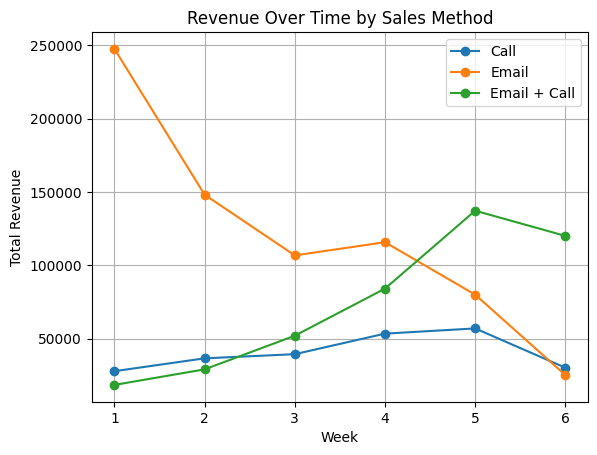

In [29]:
weekly_revenue = product_sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

pivot_table = weekly_revenue.pivot(index='week', columns='sales_method', values='revenue')

for method in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[method], label=method, marker='o')
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()

Revenue from the email sales method appears to be decreasing over time, which may seem like a negative trend. However, sending emails tends to require much less effort on the company's side and still results in decent revenue, therefore it doesn't make much sense to discontinue this method, especially given how easy it is to reach a large number of potential customers quickly and easily and how well email sales have performed when compared to telephone ones in the past.

The big increase in revenue from email + call sales shows there is potential there to garner lots of revenue, however, using both emails and calls does require more time and resources from the company, therefore an appropriate approach may be to use email for initial contact with customers, then pivot to calling for follow-ups with engaged or high-potential customers.

I think the best metric for the business to monitor in order to observe for improvements is the average revenue per customer for each sales method. This will allow the business to monitor how the effectiveness of each sales method changes over time.
The monitoring frequency should be monthly, to capture trends and make timely adjustments to sales strategies.

The initial values for this metric were calculated earlier in this report and are as follows:
- Call: $47.60 per customer
- Email: $97.13 per customer
- Email + Call: $183.65 per customer

Monitoring this metric over time will help the business assess the ongoing effectiveness of each sales method and make informed decisions about resource allocation and sales strategies.